In [21]:
#importing all libraries
#from google.colab import drive
#drive.mount('/content/drive')
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("tensorflow version: ", tf.version)

tensorflow version:  <module 'tensorflow._api.v2.version' from 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [14]:
# preprocessing and loading the dataset
DATASET_PATH = r'C:\Datasets\brain tumour' # or "C:/Datasets/brain_tumour"
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCH = 25

In [15]:
#loading the data set for preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 7023 files belonging to 4 classes.
Using 5619 files for training.
Found 7023 files belonging to 4 classes.
Using 1404 files for validation.


In [22]:
val_batches = tf.data.experimental.cardinality(validation_ds)
test_ds = validation_ds.take(val_batches // 2)
val_ds =  validation_ds.skip(val_batches // 2)
class_names = train_ds.class_names
print("Class names: ", class_names)

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

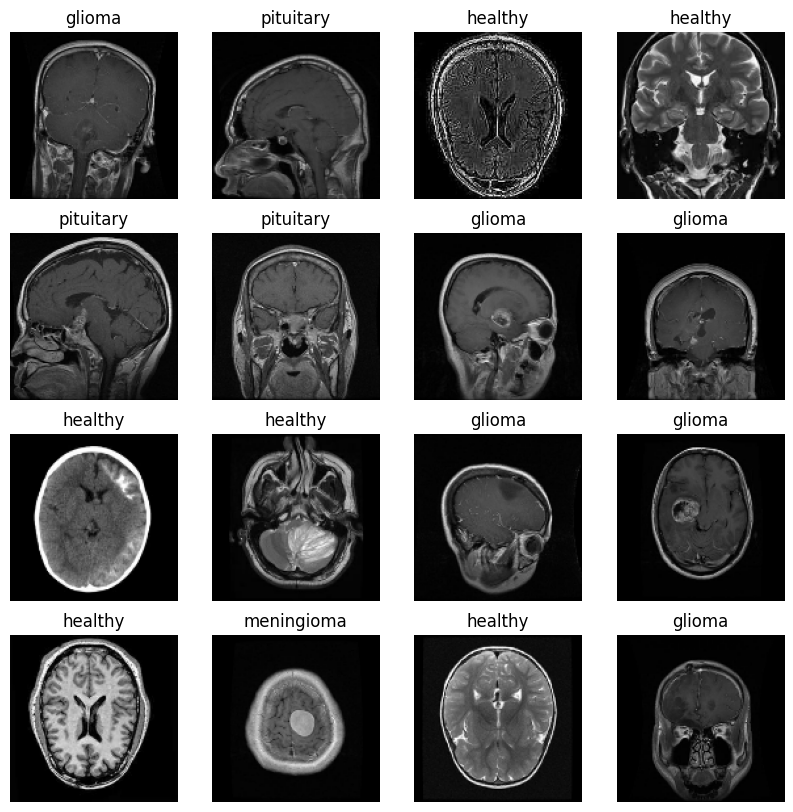

In [17]:
#random images from data set
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()

In [18]:
#Data Augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip('vertical_and_horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)]
)
#Normalization layer
normalization_layer = layers.Rescaling(1./255)

In [19]:
#Preparing the data for Training
AUTOTUNE = tf.data.AUTOTUNE
def prepare(ds, shuffle=False, augment=False):
    if shuffle:
        ds = ds.shuffle(buffer_size=1000)
    ds = ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)
#honestly wtf it is i also dont know, its working thats all i know
#after reading it, i only understand that it is mapping x to y

In [20]:
def model_1():
    model1 = keras.Sequential([
        layers.InputLayer(input_shape = IMAGE_SIZE + (3,)),
        data_augmentation,
        normalization_layer,
        layers.Conv2D(32, 3, activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation = "relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
       layers.Dense(128, activation = "relu"),
        layers.Dropout(0.5),
        layers.Dense(len(class_name), activation = "softmax")
    ])
    return model1
    models = model_1()
    models.summary()

models = model_1()
modela.summary()

NameError: name 'class_name' is not defined

In [24]:
models = model_1()
optimizer_list = [keras.optimizers.Adam(learning_rate=1e-4) for _ in range(6)]
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']

early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
checkpoint_list = [callbacks.ModelCheckpoint(f'best_model_{i+1}.keras', save_best_only=True) for i in range(6)]

models.compile(optimizer=optimizer_list[0], loss=loss, metrics=metrics)
history_1 = models.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=EPOCH,
    callbacks=[early_stop, checkpoint_list[0]]
)

NameError: name 'class_name' is not defined

In [3]:
#evaluating model
def plot_model_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 5))
    plt.suptitle(title, fontsize=16)
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
    plt.legend(loc='lower right')
    plt.title('Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', color='blue')
    plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

plot_model_history(history_1, 'Model 1: Custom CNN (Baseline)')


NameError: name 'history_1' is not defined

In [2]:
models_list = [model_1]
histories = [history_1]
model_names = ['Model 1']

test_loss_list = []
test_acc_list = []

for i, model in enumerate(models_list):
    print(f"Evaluating {model_names[i]}...")
    loss, acc = models.evaluate(test_ds)
    test_loss_list.append(loss)
    test_acc_list.append(acc)
    print(f'{model_names[i]} - Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}')

NameError: name 'model_1' is not defined

In [1]:
def evaluate_model(models, name):
    y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
    y_pred = np.argmax(models.predict(test_ds), axis=-1)
    
    # Classification Report
    print(f'Classification Report for {name}:\n')
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
modelu = model_1()
for model, name in zip(models_list, model_names):
    evaluate_model(modelu, name)

NameError: name 'model_1' is not defined